In [1]:
try:
  import autotime
except:
  !pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.6 MB/s eta 0:00:00
time: 347 µs (started: 2023-08-02 18:33:34 +00:00)


In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/Train.csv')
#data = data.groupby('extent', group_keys=False).apply(lambda x: x.sample(frac=0.05, random_state=0)) #Conjunto pequeño para hacer pruebas

In [4]:
data

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021
...,...,...,...,...,...,...
26063,ID_3II1SXC0ZO,L1084F03259C39S12149Rp41671.jpg,M,DR,30,SR2021
26064,ID_OE7OU9ZF4U,L406F04369C01S07190Rp22847.jpg,V,G,0,LR2021
26065,ID_20M531UIZZ,L134F00766C01S09784Rp26034.jpg,M,G,0,LR2021
26066,ID_BZBV2FH0KL,L1153F02464C01S00194Rp01561.jpg,F,G,0,SR2020


time: 20.5 ms (started: 2023-08-02 18:33:59 +00:00)


In [14]:
# stratified split train, val & test
val0 = data.groupby('extent', group_keys=False).apply(lambda x: x.sample(frac=0.2, random_state=0))
test = val0.groupby('extent', group_keys=False).apply(lambda x: x.sample(frac=0.5, random_state=0))
val = val0[~val0['ID'].isin(test['ID'])]
train = data[~data['ID'].isin(val['ID'])]
print(f'largo data: {len(data)}')
print(f'largo train: {len(train)}')
print(f'largo val: {len(val)}')
print(f'largo test: {len(test)}')

largo data: 26068
largo train: 23460
largo val: 2608
largo test: 2606


In [6]:
train.sort_values('extent', ascending = True).extent.value_counts(sort=False)/len(train)

0      0.827025
10     0.027962
20     0.026471
30     0.027877
40     0.026726
50     0.017050
60     0.014876
70     0.007630
80     0.011168
90     0.011509
100    0.001705
Name: extent, dtype: float64

time: 11.5 ms (started: 2023-08-02 18:33:59 +00:00)


In [7]:
val.sort_values('extent', ascending = True).extent.value_counts(sort=False)/len(val)

0      0.826687
10     0.027991
20     0.026457
30     0.027991
40     0.026457
50     0.017255
60     0.014954
70     0.007669
80     0.011120
90     0.011503
100    0.001917
Name: extent, dtype: float64

time: 6.35 ms (started: 2023-08-02 18:33:59 +00:00)


In [8]:
test.sort_values('extent', ascending = True).extent.value_counts(sort=False)/len(test)

0      0.827322
10     0.028012
20     0.026477
30     0.027629
40     0.026861
50     0.016884
60     0.014965
70     0.007675
80     0.011128
90     0.011512
100    0.001535
Name: extent, dtype: float64

time: 6.83 ms (started: 2023-08-02 18:33:59 +00:00)


In [9]:
competition_test = pd.read_csv('/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/Test.csv')

time: 860 ms (started: 2023-08-02 18:33:59 +00:00)


In [10]:
competition_test

,ID,filename,growth_stage,damage,season
0,ID_ROOWKB90UZ,L122F00315C01S02151Rp04021.jpg,V,WD,SR2020
1,ID_PTEDRY0CYM,L1089F03254C01S08845Rp25119.jpg,F,WD,LR2021
2,ID_5WJXDV96R4,L365F01913C39S12578Rp42918.jpg,V,WD,SR2021
3,ID_DM4AQLXXYG,223_repeat_2_2230_3599_2343.JPG,F,G,LR2020
4,ID_V6YTIT7I2S,L354F00276C01S08045Rp23693.jpg,F,G,LR2021
...,...,...,...,...,...
8658,ID_VYEB1ABJYA,L1122F01093C01S10236Rp20455.jpg,V,WD,LR2021
8659,ID_HQT6T7QYA4,L322F03389C39S14157Rp40614.jpg,V,WD,SR2021
8660,ID_FKC93FVGL1,L134F00855C01S05273Rp06412.jpg,V,WD,SR2020
8661,ID_EEJLBVEFGI,L410F02877C01S02293Rp01971.jpg,V,WD,SR2020


time: 14.8 ms (started: 2023-08-02 18:34:00 +00:00)


# Dataset

In [15]:
from torch.utils.data import Dataset
from skimage import io
import torch
from torchvision import transforms

class PhotosLabelsDataset(Dataset):
    """Photos labels dataset."""

    def __init__(self, data, images_dir, augmentation, train=True):
        """
        Args:
            data (DataFrame): file with annotations.
            root_dir (string): directory with all the images.
            augmentation (bool): boolean that indicates whether to apply augmentation (train set).
        """
        self.labels_frame = data
        self.images_dir = images_dir
        self.augmentation = augmentation
        self.transformation = transforms.Compose([transforms.ToPILImage(),
                                                  transforms.Resize((224, 224)),
                                                  transforms.ToTensor()])
        self.aug_transformation = transforms.Compose([transforms.ToPILImage(),
                                                      transforms.RandomHorizontalFlip(),
                                                      transforms.RandomRotation(20),
                                                      transforms.RandomAffine(degrees = 0, translate = (0.05,0.05)),
                                                      transforms.Resize((224, 224)),
                                                      transforms.ToTensor()])
        self.train = train

    def source(self):
      return self.labels_frame

    def labels(self):
      if self.train:
        return (np.array(self.labels_frame.extent)/10).astype(np.int64)
      else:
        print('Test no presenta etiquetado')

    def __len__(self):
        return len(self.labels_frame)

    def __getitem__(self, idx):
        #if torch.is_tensor(idx):
        #    idx = idx.tolist()
        base = self.labels_frame
        id = base.ID.iloc[idx]
        filename = base.filename.iloc[idx]
        image = io.imread(f'{self.images_dir}/{filename}')

        if self.augmentation:
          image_t = self.aug_transformation(image)
        else:
          image_t = self.transformation(image)

        if self.train:
          label = (base.extent.iloc[idx]/10).astype(np.int64)
          sample = {'image': image_t, 'label': label, 'ID': id}
        else:
          sample = {'image': image_t, 'ID': id}


        return sample

In [16]:
train_images_dir = '/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/train'
train_set = PhotosLabelsDataset(data = train, images_dir = train_images_dir, augmentation = True)
val_set = PhotosLabelsDataset(data = val, images_dir = train_images_dir, augmentation = False)
test_set = PhotosLabelsDataset(data = test, images_dir = train_images_dir, augmentation = False)

In [13]:
import matplotlib.pyplot as plt

def plot_images(dataset, title):
  figure = plt.figure(figsize=(10, 10))
  cols, rows = 3, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(dataset), size=(1,)).item()
      sample = dataset[sample_idx]
      figure.add_subplot(rows, cols, i)
      plt.title(sample['label']*10)
      plt.axis("off")
      plt.imshow(sample['image'].permute(1,2,0), cmap="gray")
      figure.suptitle(title, fontsize=16)
  plt.show()

time: 4 ms (started: 2023-08-02 18:34:07 +00:00)


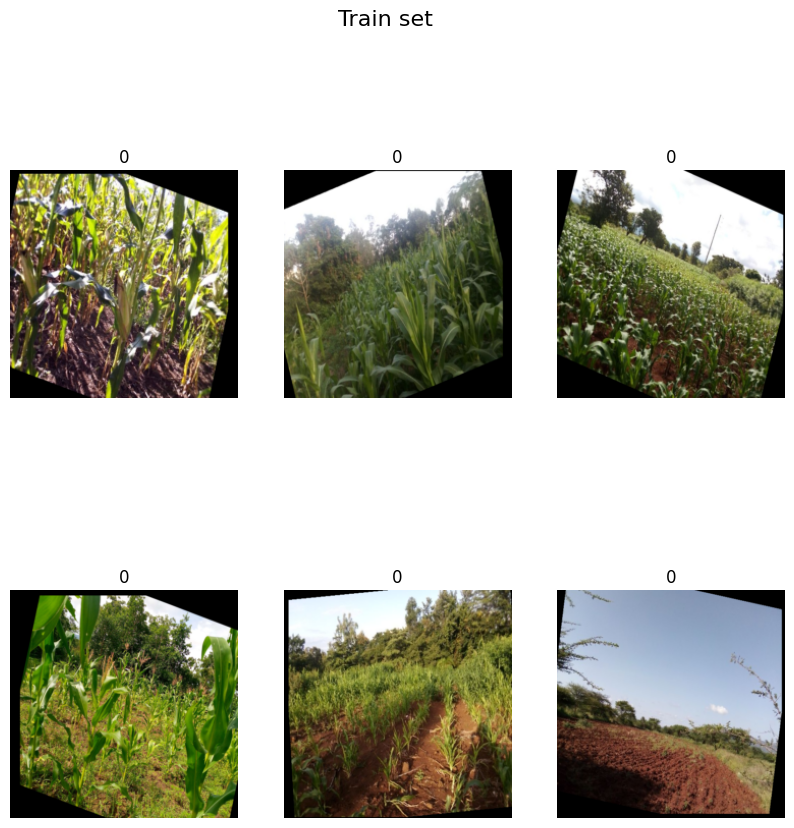

time: 2min 44s (started: 2023-08-02 18:34:07 +00:00)


In [14]:
plot_images(train_set, 'Train set')

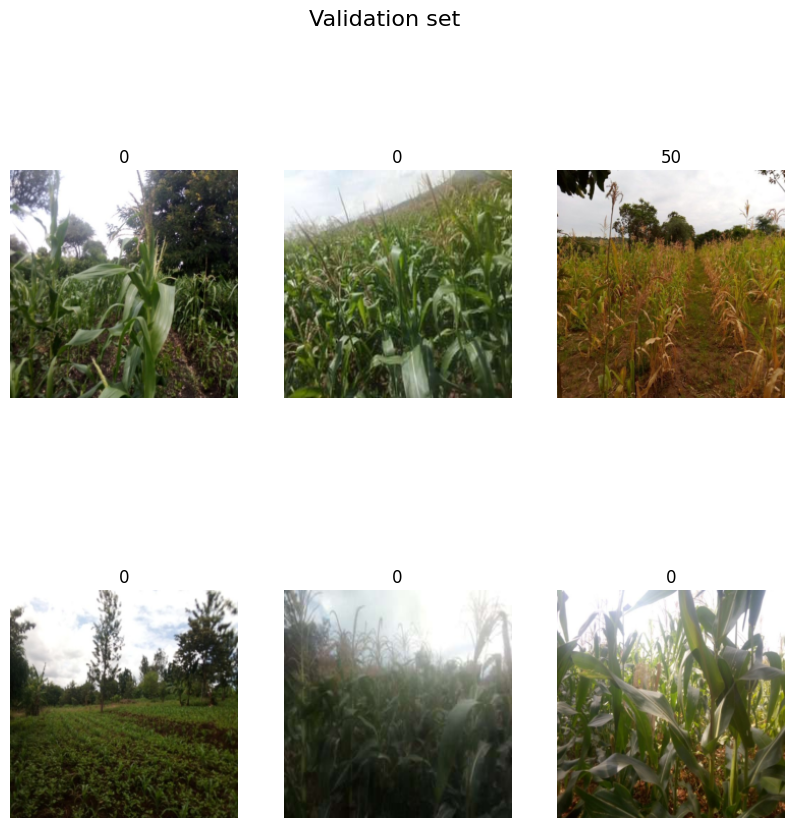

time: 5.66 s (started: 2023-08-02 18:36:51 +00:00)


In [15]:
plot_images(val_set, 'Validation set')

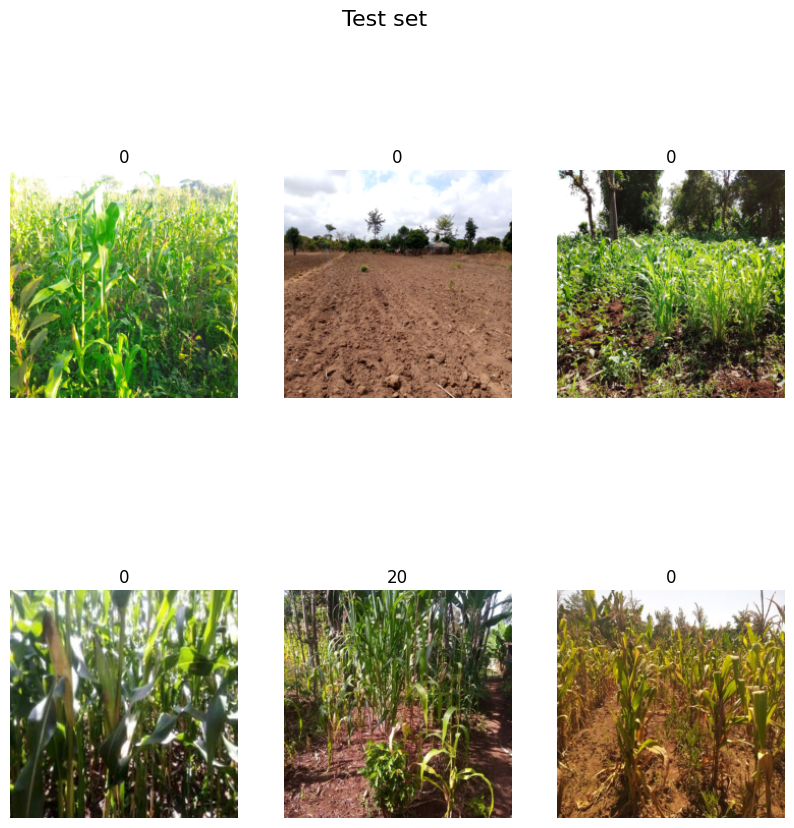

time: 6.58 s (started: 2023-08-02 18:36:57 +00:00)


In [16]:
plot_images(test_set, 'Test set')

# Loading the Pre-trained ViT

Código para entrenamiento e importación de ViT, adaptado desde el repositorio https://github.com/lukysummer/VisionTransformer-PyTorch/tree/main de la autora Lucrece (Jahyun) Shin.

## Clone the Github repo and copy all files in the current directory

In [17]:
try:
  import ml_collections
except:
  !pip install ml_collections # ML Collections is a library of Python Collections designed for ML use cases. It uses in config.py.
  !git clone https://github.com/jeonsworld/ViT-pytorch.git # repository with a Pytorch reimplementation of Google's repository for the ViT model.
  !mv ViT-pytorch/* . # move the content of the Vit-pytorch folder to outside.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ml_collections: filename=ml_collections-0.1.1-py3-none-any.whl size=94505 sha256=a135db443c7ff4fae56e2d7b372dba125dd66b9a81d7dd1c69cc51de5b409bf0
  Stored in directory: /root/.cache/pip/wheels/7b/89/c9/a9b87790789e94aadcfc393c283e3ecd5ab916aed0a31be8fe
Successfully built ml_collections
Cloning into 'ViT-pytorch'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 170 (delta 54), reused 53 (delta 53), pack-reused 106
Receiving objects: 100% (170/170), 21.20 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (83/83), done.
time: 9.17 s (started: 2023-08-02 18:37:03 +00:00)


## Download ViT-Base model checkpoint

In [18]:
from urllib.request import urlretrieve
import os

os.makedirs("model_checkpoints", exist_ok=True) # make a folder to save model checkpoints
if not os.path.isfile("model_checkpoints/ViT-B_16-224.npz"):
  # si modelo ViT-B_16-224.npz no está en la carpeta entonces ir al enlace respectivo
  # y descargar modelo
  urlretrieve("http://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz",
              "model_checkpoints/ViT-B_16-224.npz")

time: 30.1 s (started: 2023-08-02 18:37:12 +00:00)


El modelo usado tiene:
*   ViT-Base
*   pre-trained on ImageNet-21k and fine-tuned on the smaller ImageNet2012
*   takes in input images of size 224 by 224
*   divides input images into 16 by 16 grid (196 image tokens) -> the image is divided into 196 squares of 16 by 16 pixels


    
    
    

## Define a ViT-Base model instance and load the downloaded checkpoint

In [19]:
from models.modeling import VisionTransformer, CONFIGS
import numpy as np
# set num_classes=1000 here even if your dataset has a different # of classes.
# you can reset it later; here is only for loading pre-trained model checkpoint.

# definir cofiguración del modelo
model = VisionTransformer(CONFIGS["ViT-B_16"],
                          img_size=224, # imput images size
                          num_classes=1000, # number of classes of ImageNet2012
                          zero_head=False, # initializing the head to zero = False
                          vis=True) # ?
model.load_from(np.load("model_checkpoints/ViT-B_16-224.npz")) # cargar pesos al modelo

time: 2.1 s (started: 2023-08-02 18:37:43 +00:00)


## Define ViT encoder and a separate fully-connected classifier

In [20]:
from torch import nn

encoder = nn.Sequential(*[model.transformer.embeddings, model.transformer.encoder])
# Explanation of *
'''
layers in this snippet is a standard python list.
First of all, python lists are not registered in a nn.Module which will lead to issues.
That is way there exist a list-like layer which is a nn.Module.

So imagine layers consist of:
layers=[layer1,layer2,layer3]
and
seq_layers=nn.Sequential(*layers)

Secondly, nn.Sequential runs the three layers at once, this is, it takes the input,
run layer1, take output1 and feed layer2 with it, take output2 and feed layer3
giving as result output3
'''
ViT_embed_dim = 768  # final embedding dimension for ViT-B. Definido en el paper
n_classes = 11        # number of classes for my dataset (0,10,20,30,40,50,60,70,80,90,100)
classifier = nn.Linear(ViT_embed_dim, n_classes) # created a separate classifier using torch.nn.Linear that classifies the embeddings into one of N classes

time: 1.12 ms (started: 2023-08-02 18:37:45 +00:00)


## Se crea clase para definir modelo de manera simple y rápida

La siguiente clase está basada en las celdas de código anteriores

In [21]:
class ModelDefine:
  def __init__(self):
    try:
      import ml_collections
    except:
      !pip install ml_collections # ML Collections is a library of Python Collections designed for ML use cases. It uses in config.py.
      !git clone https://github.com/jeonsworld/ViT-pytorch.git # repository with a Pytorch reimplementation of Google's repository for the ViT model.
      !mv ViT-pytorch/* . # move the content of the Vit-pytorch folder to outside.

    from urllib.request import urlretrieve
    import os

    os.makedirs("model_checkpoints", exist_ok=True) # make a folder to save model checkpoints
    if not os.path.isfile("model_checkpoints/ViT-B_16-224.npz"):
      # si modelo ViT-B_16-224.npz no está en la carpeta entonces ir al enlace respectivo
      # y descargar modelo
      urlretrieve("http://storage.googleapis.com/vit_models/imagenet21k+imagenet2012/ViT-B_16-224.npz",
                  "model_checkpoints/ViT-B_16-224.npz")

  def configuration(self):
    from models.modeling import VisionTransformer, CONFIGS
    import numpy as np
    # set num_classes=1000 here even if your dataset has a different # of classes.
    # you can reset it later; here is only for loading pre-trained model checkpoint.
    # definir cofiguración del modelo
    model = VisionTransformer(CONFIGS["ViT-B_16"],
                              img_size=224, # imput images size
                              num_classes=1000, # number of classes of ImageNet2012
                              zero_head=False, # initializing the head to zero = False
                              vis=True) # ?
    model.load_from(np.load("model_checkpoints/ViT-B_16-224.npz")) # cargar pesos al modelo

    from torch import nn

    encoder = nn.Sequential(*[model.transformer.embeddings, model.transformer.encoder])
    # Explanation of *
    '''
    layers in this snippet is a standard python list.
    First of all, python lists are not registered in a nn.Module which will lead to issues.
    That is way there exist a list-like layer which is a nn.Module.

    So imagine layers consist of:
    layers=[layer1,layer2,layer3]
    and
    seq_layers=nn.Sequential(*layers)

    Secondly, nn.Sequential runs the three layers at once, this is, it takes the input,
    run layer1, take output1 and feed layer2 with it, take output2 and feed layer3
    giving as result output3
    '''
    ViT_embed_dim = 768  # final embedding dimension for ViT-B. Definido en el paper
    n_classes = 11        # number of classes for my dataset (0,10,20,30,40,50,60,70,80,90,100)
    classifier = nn.Linear(ViT_embed_dim, n_classes) # created a separate classifier using torch.nn.Linear
                                                     # that classifies the embeddings into one of N classes
    return encoder, classifier


time: 1.97 ms (started: 2023-08-02 18:37:45 +00:00)


# Se hace entrenamiento

## Se hace una clase de entrenamiento y validación denominada FineTuneViT

In [22]:
from google.colab import files
import math
class FineTuneViT:
  def __init__(self, encoder, classifier, train_loader, val_loader,
               n_epochs, optimizer_encoder, optimizer_classifier, PATH,
               early_stop=False, epochs_limit=3, multi_label_data=False, device='cuda'):
    self.encoder = encoder.to(device)
    self.classifier = classifier.to(device)
    self.train_loader = train_loader
    self.val_loader = val_loader
    self.n_epochs = n_epochs
    self.optimizer_encoder = optimizer_encoder
    self.optimizer_classifier = optimizer_classifier
    self.PATH = PATH
    self.early_stop = early_stop
    self.epochs_limit = epochs_limit
    self.multi_label_data = multi_label_data
    self.device = device

    self.count_epochs_limit = 0
    self.batch_print = math.floor(len(train_loader)/2) # Imprimir las pérdidas 2 veces cada epoca




  #  define_loss -> Define loss function
  def define_loss(self):
    ### Different loss criterion for multi-label and single-label data
    if self.multi_label_data:
      self.criterion = nn.BCEWithLogitsLoss()
    else: # single-label data (standard)
      self.criterion = nn.CrossEntropyLoss()

    self.train_losses, self.val_losses = [], []




  #  save_model -> Log results and save model checkpoints
  def save_model(self, e, encoder, optimizer_encoder,
                 classifier, optimizer_classifier,
                 train_losses, val_losses, val_loss):
    torch.save({'epoch': e+1,
                'encoder_state_dict': encoder.state_dict(),
                'optimizer_encoder_state_dict': optimizer_encoder.state_dict(),
                'classifier_state_dict': classifier.state_dict(),
                'optimizer_classifier_state_dict': optimizer_classifier.state_dict(),
                'train_losses': train_losses,
                'val_losses': val_losses,
                'validation loss': val_loss,}, self.PATH)

    files.download(self.PATH)




  #  training -> Train on training data
  def training(self, e, encoder, classifier, optimizer_encoder,
               optimizer_classifier, train_loss, running_loss):
    for batch_i, sample in enumerate(self.train_loader):
      img = sample['image']
      tgt = sample['label']
      img, tgt = img.to(self.device), tgt.to(self.device)

      ## ViT encoder has 2 outputs, final embedding vectors for all image tokens and a stack of attention weights. ##
      ## Here we are not using attention weights during training/validation. ##
      ## embeddings: [batch_size, n_tokens, embedding dim]  e.g.[32, 197, 768] (196 tokens plus 1 class token) ##
      embeddings, att_weights = encoder(img)

      ## Extract [CLS] token (at index 0) 's embeddings used for classification ##
      embedding_cls_token = embeddings[:, 0, :] # [batch_size, embedding dim]

      logits = classifier(embedding_cls_token) # [batch_size, n_classes]

      optimizer_encoder.zero_grad()
      optimizer_classifier.zero_grad()
      if self.multi_label_data:
        loss = self.criterion(logits.type(torch.FloatTensor), tgt.type(torch.FloatTensor)) # loss include softmax
      else:
        #loss = self.criterion(logits.squeeze(-1).to(self.device), tgt)
        loss = self.criterion(logits.to(self.device), tgt) # loss include softmax
      loss.backward()
      optimizer_encoder.step()
      optimizer_classifier.step()
      train_loss += loss.item()
      running_loss += loss.item()

      if batch_i % self.batch_print == (self.batch_print-1):    # print every 300 mini-batches
        print(f'[{e + 1}, {batch_i + 1:5d}] loss: {running_loss / self.batch_print:.3f}')
        running_loss = 0.

    train_loss = train_loss/(batch_i+1) # batch train loss
    return encoder, classifier, optimizer_encoder, optimizer_classifier, train_loss




  #  validation -> Evaluate on valdiation data
  def validation(self, encoder, classifier, val_loss):
    for batch_i, sample in enumerate(self.val_loader):
      img = sample['image']
      tgt = sample['label']
      img, tgt = img.to(self.device), tgt.to(self.device)
      with torch.no_grad():
        embeddings, att_weights = encoder(img) # embeddings: [batch_size, n_tokens, embedding dim]
        embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
        logits = classifier(embedding_cls_token)   # [batch_size, n_classes]
        if self.multi_label_data:
          loss = self.criterion(logits.type(torch.FloatTensor), tgt.type(torch.FloatTensor)) # loss include softmax
        else:
          #loss = self.criterion(logits.squeeze(-1).to(self.device), tgt)
          loss = self.criterion(logits.to(self.device), tgt) # loss include softmax
        val_loss += loss.item()

    val_loss = val_loss/(batch_i+1) # batch validation loss
    return val_loss




  #  early_stopping -> Early Stopping
  def early_stopping(self, e, val_loss, count_epochs_limit, encoder,
                     optimizer_encoder, classifier, optimizer_classifier,
                     train_losses, val_losses, val_loss_ini, stop_training):
    print(val_loss_ini)
    if val_loss < val_loss_ini:
      # se guarda el modelo
      self.save_model(e, encoder, optimizer_encoder,
                        classifier, optimizer_classifier,
                        train_losses, val_losses, val_loss)

      # se actualiza validation_loss
      val_loss_ini = val_loss
      # se actualizan epocas
      count_epochs_limit = 0

    elif val_loss >= val_loss_ini and count_epochs_limit < self.epochs_limit:
      # comienza el contador de límite de época para terminar entrenamiento
      count_epochs_limit += 1

    else:
      # se termina entrenamiento
      stop_training = 1

    return count_epochs_limit, stop_training, val_loss_ini




  #  train_val -> Training and validation for each epoch
  def train_val(self):
    self.define_loss()
    encoder = self.encoder
    classifier = self.classifier
    optimizer_encoder = self.optimizer_encoder
    optimizer_classifier = self.optimizer_classifier
    train_losses = self.train_losses
    val_losses = self.val_losses
    count_epochs_limit = self.count_epochs_limit
    for e in range(self.n_epochs):
      print(f'epoca actual: {e+1}')
      #  1. TRAIN
      encoder.train()
      classifier.train()
      train_loss = 0.
      running_loss = 0.
      encoder, classifier, optimizer_encoder, optimizer_classifier, train_loss = self.training(e, encoder, classifier,
                                                                                               optimizer_encoder,
                                                                                               optimizer_classifier,
                                                                                               train_loss, running_loss)
      train_losses.append(train_loss)
      #  2. VALIDATION
      encoder.eval()
      classifier.eval()
      val_loss = 0.
      val_loss = self.validation(encoder, classifier, val_loss)
      val_losses.append(val_loss)
      print(f'train_loss: {train_loss:.3f}, val_loss: {val_loss:.3f}')
      #  3. EARLY STOPPING
      if self.early_stop:
        stop_training = 0
        if e == 0: # se define pérdida de validación inicial en primera epoca
          val_loss_ini = val_loss
          # guardar modelo
          self.save_model(e, encoder, optimizer_encoder,
                          classifier, optimizer_classifier,
                          train_losses, val_losses, val_loss)
        else:
          count_epochs_limit, stop_training, val_loss_ini = self.early_stopping(e, val_loss, count_epochs_limit, encoder,
                                                                optimizer_encoder, classifier, optimizer_classifier,
                                                                 train_losses, val_losses, val_loss_ini, stop_training)
        if stop_training:
          print('Early stopping')
          break


      else:
        self.save_model(e, encoder, optimizer_encoder,
                        classifier, optimizer_classifier,
                        train_losses, val_losses, val_loss)

time: 7.7 ms (started: 2023-08-02 18:37:45 +00:00)


## Se hace una clase para balancear datos durante el entrenamiento

In [17]:
from torch import optim
from torch.utils.data import DataLoader, WeightedRandomSampler
import math

class BalancingData:
  def __init__(self, dataset, batch_size, num_workers):
    self.dataset = dataset
    self.batch_size = batch_size
    self.num_workers = num_workers
    self.class_count = list(dataset.source().sort_values('extent', ascending = True).extent.value_counts(sort=False))
    self.class_weights = [1/c for c in self.class_count]
    self.labels = dataset.labels()

  def __len__(self):
    return math.ceil(len(self.dataset)/self.batch_size)

  def weigths_balance(self):
  #def weigths_balance(self, base_dataloader):

    w0 = np.where(self.labels == 0, self.class_weights[0], 0)
    for weight_idx in range(1, len(self.class_weights), 1): # Recorrer de 1 a 10
      wi = np.where(self.labels == weight_idx, self.class_weights[weight_idx], 0)
      w0 += wi
    sampler = WeightedRandomSampler(w0, num_samples = len(w0), replacement = True)
    return sampler
    '''
    sample_weights = [0]*len(self.dataset)
    for idx, sample in enumerate(self.dataset): # O(n)
      label = sample['label']
      class_weight = self.class_weights[label]
      sample_weights[idx] = class_weight
    self.sampler = WeightedRandomSampler(sample_weights, num_samples = len(sample_weights), replacement = True)
    return self.sampler
    '''
    '''
    # Iterar por batch
    W = torch.tensor([])
    for batch_idx, sample in enumerate(base_dataloader): # O((n/batch_size)*11)
      label = sample['label'] # tamaño de label = [32]
      w0 = torch.where(label == 0, self.class_weights[0], 0.0)
      for weight_idx in range(1, len(self.class_weights), 1): # Recorrer de 1 a 10
        wi = torch.where(label == weight_idx, self.class_weights[weight_idx], 0.0)
        w0 += wi#
      W = torch.cat((W, w0), 0)
    self.sampler = WeightedRandomSampler(W, num_samples = len(W), replacement = True)
    return self.sampler
    '''


  def balance(self):
    #base_dataloader = DataLoader(self.dataset, batch_size=self.batch_size,
    #                             num_workers=self.num_workers, shuffle = False)
    #sampler = self.weigths_balance(base_dataloader)
    sampler = self.weigths_balance()
    loader = DataLoader(self.dataset, batch_size=self.batch_size,
                        num_workers=self.num_workers, sampler=sampler)
    return loader



## Se inicia entrenamiento

In [25]:
# Define dataloaders
#train_loader = DataLoader(train_set, batch_size=32, num_workers=2, shuffle = True)
#val_loader = DataLoader(val_set, batch_size=32, num_workers=2, shuffle = False)
train_loader = BalancingData(train_set, batch_size=32, num_workers=2)
train_loader_balance = train_loader.balance()
val_loader = DataLoader(val_set, batch_size=32, num_workers=2, shuffle = False)

In [ ]:
# Define lr and optimizer
lr = 3e-6 # Learning rate
opt_encoder = optim.Adam(encoder.parameters(), lr=lr, betas=(0.5, 0.9))
opt_classifier = optim.Adam(classifier.parameters(), lr=lr, betas=(0.5, 0.9))

# Define PATH
save_path = 'model_ViT_1.pt'


# Taining
fine_tune = FineTuneViT(encoder, classifier, train_loader_balance, val_loader,
                        n_epochs=10, optimizer_encoder=opt_encoder,
                        optimizer_classifier=opt_classifier,
                        PATH = save_path, early_stop=True, epochs_limit=2,
                        multi_label_data=False, device='cuda')
fine_tune.train_val()

epoca actual: 1
[1,   500] loss: 107.708
val_loss : 1.4110566741082726
epoca actual: 2
[2,   500] loss: 86.328
val_loss : 1.167469223824943
1.4110566741082726
epoca actual: 3
[3,   500] loss: 77.150
val_loss : 1.011460460540725
1.167469223824943
epoca actual: 4
[4,   500] loss: 71.895
val_loss : 1.106895204724335
1.011460460540725
epoca actual: 5
[5,   500] loss: 67.501
val_loss : 1.0192575378388893
1.011460460540725
epoca actual: 6
[6,   500] loss: 62.397
val_loss : 1.0018639633568323
1.011460460540725
epoca actual: 7


## Descargar modelo

In [ ]:
from google.colab import files
files.download('model_ViT_1.pt')

## Codigo Funcional (se omite)

In [ ]:
'''
def fine_tune_ViT(encoder,     # ViT encoder (pre-trained)
                  classifier,  # single-layer fully-connected classifier
                  train_loader, # train dataloader
                  val_loader, # validation dataloader
                  n_epochs,    # number of epochs to fine-tune
                  optimizer_encoder,
                  optimizer_classifier,
                  epochs_limit = 3, # límite de epocas en que aumenta la pérdida de validación
                  multi_label_data=False,
                  device = 'cuda'
                  ):

  encoder.to(device)
  classifier.to(device)
  count_epochs_limit = 0 # numero de epocas en que aumenta la perdida de validación y
                         # hay que terminar el entrenamiento

  #  1. Define loss function

  ### Different loss criterion for multi-label and single-label data
  if multi_label_data:
    criterion = nn.BCEWithLogitsLoss()
  else: # single-label data (standard)
    criterion = nn.CrossEntropyLoss()

  train_losses, val_losses, val_accs = [], [], []
  for e in range(n_epochs):
    print(f'epoca actual: {e+1}')
    #  2. Train on training data
    encoder.train()
    classifier.train()
    train_loss = 0.
    running_loss = 0.
    for batch_i, sample in enumerate(train_loader):
      img = sample['image']
      tgt = (sample['label']/10).long()
      img, tgt = img.to(device), tgt.to(device)

      ## ViT encoder has 2 outputs, final embedding vectors for all image tokens and a stack of attention weights. ##
      ## Here we are not using attention weights during training/validation. ##
      ## embeddings: [batch_size, n_tokens, embedding dim]  e.g.[32, 197, 768] (196 tokens plus 1 class token) ##
      embeddings, att_weights = encoder(img)

      ## Extract [CLS] token (at index 0) 's embeddings used for classification ##
      embedding_cls_token = embeddings[:, 0, :] # [batch_size, embedding dim]

      logits = classifier(embedding_cls_token) # [batch_size, n_classes]
      print('logits_size:', logits.size())
      print('logits_size:', logits.squeeze(-1).size())

      optimizer_encoder.zero_grad()
      optimizer_classifier.zero_grad()
      if multi_label_data:
        loss = criterion(logits.type(torch.FloatTensor), tgt.type(torch.FloatTensor)) # loss include softmax
      else:
        loss = criterion(logits.squeeze(-1).to(device), tgt) # loss include softmax
      loss.backward()
      optimizer_encoder.step()
      optimizer_classifier.step()
      train_loss += loss.item()
      running_loss += loss.item()

      if batch_i % 10 == 9:    # print every 100 mini-batches}
        print(f'[{e + 1}, {batch_i + 1:5d}] loss: {running_loss / 10:.3f}')
        running_loss = 0.

    #  3. Evaluate on valdiation data
    encoder.eval()
    classifier.eval()
    val_loss = 0.
    for batch_i, (img, tgt) in enumerate(val_loader):
      img, tgt = img.to(device), tgt.to(device)
      with torch.no_grad():
        embeddings, att_weights = encoder(img) # embeddings: [batch_size, n_tokens, embedding dim]
        embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
        logits = classifier(embedding_cls_token)   # [batch_size, n_classes]
        loss = criterion(logits.type(torch.FloatTensor), tgt.type(torch.FloatTensor))
        val_loss += loss.item()

    val_losses.append(val_loss)
    print('val_loss :', val_loss)

    #  4. Early stopping
    if early_stopping:

      if e == 0: # se define pérdida de validación inicial en primera epoca
        val_loss_ini == val_loss
        # guardar modelo

      else:
        if val_loss < val_loss_ini:
          # se guarda el modelo
          torch.save({
                'epoch': epoch,
                'model_state_dict': net.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'validation loss': val_loss,
                }, PATH)
          # se actualiza validation_loss
          val_loss_ini = val_loss
          # se actualizan epocas
          count_epochs_limit = 0

        elif val_loss >= val_loss_ini and count_epochs_limit < epochs_limit:
          # se termina entrenamiento
          count_epochs_limit += 1

        else:
          # se termina entrenamiento
          break

    else:
      #  5. Log results and save model checkpoints
      print("Epoch: {}/{}   Val CE Loss: {:.5f}".format(e+1, n_epochs, val_loss/len(val_loader)))
      torch.save({'model_state_dict': encoder.state_dict()}, 'encoder_{}.pt'.format(e+1))
      torch.save({'model_state_dict': classifier.state_dict()}, 'classifier_{}.pt'.format(e+1))

  return encoder, classifier
'''

In [ ]:
'''
from torch import optim
from torch.utils.data import DataLoader

# Define dataloaders
train_loader = DataLoader(train_set, batch_size=32, num_workers=2, shuffle = True)
val_loader = DataLoader(val_set, batch_size=32, num_workers=2, shuffle = False)

# Define lr and optimizer
lr = 3e-6 # Learning rate
opt_encoder    = optim.Adam(encoder.parameters(), lr=lr, betas=(0.5, 0.9))
opt_classifier = optim.Adam(classifier.parameters(), lr=lr, betas=(0.5, 0.9))


# Taining
encoder, classifier = fine_tune_ViT(encoder,
                                    classifier,
                                    train_loader,
                                    val_loader,
                                    n_epochs=4,
                                    optimizer_encoder=opt_encoder,
                                    optimizer_classifier=opt_classifier,
                                    multi_label_data=False)

'''

# Load model & Evaluate

## Función para graficar pérdidas y evaluar el modelo con conjunto de test

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# training and validation loss
def losses_plot(epocas, train_losses, val_losses):
  mpl.style.use('seaborn')
  plt.plot(epocas, train_losses, 'teal', label='Training loss')
  plt.plot(epocas, val_losses, 'orange', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
try:
  import ignite
except:
  !pip install pytorch-ignite

from ignite.metrics import ClassificationReport
from ignite.engine import *
from ignite.handlers import *
from ignite.metrics import *
from ignite.utils import *
from ignite.contrib.metrics.regression import *
from ignite.contrib.metrics import *

# create default evaluator for doctests

def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

def evaluator(model, dataloader, classes, device):
  encoder = model['encoder'].to(device)
  classifier = model['classifier'].to(device)
  encoder.eval()
  classifier.eval()
  # since we're not training, we don't need to calculate the gradients for our outputs
  y_pred = torch.empty(0).to(device)
  y_true = torch.empty(0).to(device)
  with torch.no_grad():
      for data in dataloader:
          img = data['image'].to(device)
          labels = data['label'].to(device)
          #y_true = torch.cat((y_true.double(), labels.double()), 0) # self.double() is equivalent to self.to(torch.float64)
          y_true = torch.cat((y_true, labels), 0)
          # calculate outputs by running images through the network
          embeddings, att_weights = encoder(img) # embeddings: [batch_size, n_tokens, embedding dim]
          embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
          logits = classifier(embedding_cls_token)   # [batch_size, n_classes]
          #concatenación de tensores
          y_pred = torch.cat((y_pred, logits), 0)
      y_pred = torch.softmax(y_pred, 0) # Probability distribution
      metric = ClassificationReport(output_dict=True, is_multilabel=False, labels = classes)
      metric.attach(default_evaluator, "cr")
      state = default_evaluator.run([[y_pred, y_true]])

      for c in classes:
        print(f'Métricas clase {c} = {state.metrics["cr"][c]}')

## Define model class (encoder & classifier)

In [ ]:
transformer = ModelDefine()
encoder, classifier = transformer.configuration()

## Load model and evaluate in test set

In [ ]:
model_dict = torch.load('model_ViT_1.pt')
encoder.load_state_dict(model_dict['encoder_state_dict'])
classifier.load_state_dict(model_dict['classifier_state_dict'])
test_loader = DataLoader(test_set, batch_size=32, num_workers=2, shuffle = False)
epocas = list(range(1, model_dict['epoch']+1, 1))
train_losses = model_dict['train_losses']
val_losses = model_dict['val_losses']

model= {'encoder': encoder, 'classifier':classifier}
classes=['0','10','20', '30', '40', '50', '60', '70', '80', '90', '100']
device='cuda'

In [ ]:
losses_plot(epocas, train_losses, val_losses)

In [ ]:
evaluator(model, test_loader, classes, device)

# Generar archivo para "submission"

## Cargar modelo

In [ ]:
transformer = ModelDefine()
encoder, classifier = transformer.configuration()

In [ ]:
model_dict = torch.load('model_ViT_1.pt')
encoder.load_state_dict(model_dict['encoder_state_dict'])
classifier.load_state_dict(model_dict['classifier_state_dict'])

model= {'encoder': encoder, 'classifier':classifier}
classes=['0','10','20', '30', '40', '50', '60', '70', '80', '90', '100']
device='cuda'

## Generar predicciones

In [ ]:
test_images_dir = '/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/test'
competition_testset = PhotosLabelsDataset(data = competition_test, images_dir = test_images_dir, augmentation = False, train=False)
competition_testloader = DataLoader(competition_testset, batch_size=32, num_workers=2, shuffle = False)

In [ ]:
def submission(model, dataloader, device, )
  encoder = model['encoder'].to(device)
  classifier = model['classifier'].to(device)
  encoder.eval()
  classifier.eval()
  y_pred = torch.empty(0).to(device)
  id = torch.empty(0)
  for batch_i, sample in enumerate(dataloader):
    img = sample['image']
    tgt = sample['label']
    img, tgt = img.to(device), tgt.to(device)
    id = torch.cat((id, sample['ID']), 0)
    with torch.no_grad():
      embeddings, att_weights = encoder(img) # embeddings: [batch_size, n_tokens, embedding dim]
      embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
      logits = classifier(embedding_cls_token)   # [batch_size, n_classes]
      y_pred = torch.cat((y_pred, logits), 0)
  y_pred = torch.argmax(torch.softmax(y_pred, 0), dim=1) # Probability distribution
  extent = pd.DataFrame(y_pred, columns=['extent'])
  ID = pd.DataFrame(id, columns=['ID'])
  submission = pd.concat([ID, extent], axis=1)
  submission.to_csv('Submission.csv')

In [ ]:
submission(model=model, dataloader=competition_testloader, device=device) # generar archivo Submission.csv

In [ ]:
from google.colab import files
files.download('Submission.csv', index = False)

### Codigos de test (eliminar)

In [ ]:
i = np.array(['id1', 'id2', 'id3'])
t = torch.tensor([1,2,3])

In [ ]:
ic = pd.DataFrame(i, columns=['ID'])
tc = pd.DataFrame(t, columns=['extent'])

In [ ]:
pd.concat([ic, tc], axis=1)

In [ ]:
sample = pd.read_csv('/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/SampleSubmission.csv')

In [ ]:
sample

## CAM (Class Activation Mapping)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch
import numpy as np
import cv2
#from samples.CLS2IDX import CLS2IDX

In [ ]:
!git clone https://github.com/hila-chefer/Transformer-Explainability # repository with a Pytorch reimplementation of Google's repository for the ViT model.


In [ ]:
from basel.ViT.ViT_explanation_generator import LRP

normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

# create heatmap from mask on image
def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return cam

# initialize ViT pretrained
device = 'cuda'
#encoder = model['encoder'].to(device)
#classifier = model['classifier'].to(device)
#encoder.eval()
#classifier.eval()
#model = nn.Sequential(*[encoder, classifier]).cuda()
#model = encoder
#model = vit_LRP(pretrained=True).cuda()
model.cuda()
model.eval()
attribution_generator = LRP(model)

def generate_visualization(original_image, class_index=None):
    transformer_attribution = attribution_generator.generate_LRP(original_image.unsqueeze(0).cuda(), method="transformer_attribution", index=class_index).detach()
    transformer_attribution = transformer_attribution.reshape(1, 1, 14, 14)
    transformer_attribution = torch.nn.functional.interpolate(transformer_attribution, scale_factor=16, mode='bilinear')
    transformer_attribution = transformer_attribution.reshape(224, 224).cuda().data.cpu().numpy()
    transformer_attribution = (transformer_attribution - transformer_attribution.min()) / (transformer_attribution.max() - transformer_attribution.min())
    image_transformer_attribution = original_image.permute(1, 2, 0).data.cpu().numpy()
    image_transformer_attribution = (image_transformer_attribution - image_transformer_attribution.min()) / (image_transformer_attribution.max() - image_transformer_attribution.min())
    vis = show_cam_on_image(image_transformer_attribution, transformer_attribution)
    vis =  np.uint8(255 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)
    return vis

In [ ]:
model

In [ ]:
model

In [ ]:
train_images_dir = '/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/train'
file_name = 'L1095F01453C01S00474Rp09210.jpg'
#image = io.imread(f'{train_images_dir}/{file_name}')
image = Image.open(f'{train_images_dir}/{file_name}')
dog_cat_image = transform(image)

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image);
axs[0].axis('off');

output = model(dog_cat_image.unsqueeze(0).cuda())

print(dog_cat_image.type())
# cat - the predicted class
cat = generate_visualization(dog_cat_image)

# dog
# generate visualization for class 243: 'bull mastiff'
dog = generate_visualization(dog_cat_image, class_index=243)


axs[1].imshow(cat);
axs[1].axis('off');
axs[2].imshow(dog);
axs[2].axis('off');

In [ ]:
len(model(dog_cat_image.unsqueeze(0).cpu())[0])

In [ ]:
model(dog_cat_image.unsqueeze(0).cuda())

In [ ]:
device = 'cuda'
encoder = model['encoder'].to(device)
classifier = model['classifier'].to(device)
encoder.eval()
classifier.eval()

cam_extractor = SmoothGradCAMpp(encoder, encoder[1].layer[11].ffn_norm)
#cam_extractor = SmoothGradCAMpp(encoder, encoder[-1])

In [ ]:
try:
  import pytorch_grad_cam
except:
  !pip install ttach
  !git clone https://github.com/jacobgil/pytorch-grad-cam # repository with a Pytorch reimplementation of Google's repository for the ViT model.
  !mv pytorch-grad-cam/* . # move the content of the Vit-pytorch folder to outside.

In [ ]:
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

model = encoder
target_layers = [encoder[1].layer[11].ffn_norm]
# Get your input
train_images_dir = '/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/train'
file_name = 'L1095F01453C01S00474Rp09210.jpg'
image = io.imread(f'{train_images_dir}/{file_name}')
transformation = transforms.Compose([transforms.ToPILImage(),
                                     transforms.Resize((224, 224)),
                                     transforms.ToTensor()])
input_tensor = transformation(image).to(device) # Create an input tensor image for your model..
# Note: input_tensor can be a batch tensor with several images!

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers)

# You can also use it within a with statement, to make sure it is freed,
# In case you need to re-create it inside an outer loop:
# with GradCAM(model=model, target_layers=target_layers, use_cuda=args.use_cuda) as cam:
#   ...

# We have to specify the target we want to generate
# the Class Activation Maps for.
# If targets is None, the highest scoring category
# will be used for every image in the batch.
# Here we use ClassifierOutputTarget, but you can define your own custom targets
# That are, for example, combinations of categories, or specific outputs in a non standard model.

#targets = [ClassifierOutputTarget(281)]
#input_tensor = input_tensor.unsqueeze(0)
#embeddings, att_weights = encoder(input_tensor) # embeddings: [batch_size, n_tokens, embedding dim]
#embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
#targets = classifier(embedding_cls_token)
#targets = torch.argmax(torch.softmax(logits, 0), dim=1) # Probability distribution
targets = None

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

Basado en https://github.com/frgfm/torch-cam

In [ ]:
# Set your CAM extractor
try:
  import torchcam
except:
  !pip install torchcam

from torchcam.methods import SmoothGradCAMpp

In [ ]:
encoder[1]

In [ ]:
print(vars(encoder[1]))

In [ ]:
encoder[1]

In [ ]:
encoder[1].layer[11].ffn_norm

In [ ]:
cam_extractor

In [ ]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchvision.models import resnet18
from torchcam.methods import SmoothGradCAMpp



# Get your input
train_images_dir = '/content/gdrive/MyDrive/CGIAR Eyes on the Ground Challenge/train'
file_name = 'L1095F01453C01S00474Rp09210.jpg'
image = io.imread(f'{train_images_dir}/{file_name}')
transformation = transforms.Compose([transforms.ToPILImage(),
                                     transforms.Resize((224, 224)),
                                     transforms.ToTensor()])
image_t = transformation(image).to(device)

image_t = image_t.unsqueeze(0)
# Preprocess your data and feed it to the model
embeddings, att_weights = encoder(image_t) # embeddings: [batch_size, n_tokens, embedding dim]
embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
logits = classifier(embedding_cls_token)
y_pred = torch.argmax(torch.softmax(logits, 0), dim=1) # Probability distribution
#print(logits)
print(y_pred.item())
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(y_pred.item(), embedding_cls_token)

In [ ]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()

In [ ]:
def evaluator(model, dataloader, classes, device):
  encoder = model['encoder'].to(device)
  classifier = model['classifier'].to(device)
  encoder.eval()
  classifier.eval()
  # since we're not training, we don't need to calculate the gradients for our outputs
  y_pred = torch.empty(0).to(device)
  y_true = torch.empty(0).to(device)
  with torch.no_grad():
      for data in dataloader:
          img = data['image'].to(device)
          labels = (data['label'].to(device)/10).long()
          #y_true = torch.cat((y_true.double(), labels.double()), 0) # self.double() is equivalent to self.to(torch.float64)
          y_true = torch.cat((y_true, labels), 0)
          # calculate outputs by running images through the network
          embeddings, att_weights = encoder(img) # embeddings: [batch_size, n_tokens, embedding dim]
          embedding_cls_token = embeddings[:, 0, :]  # [batch_size, embedding dim]
          logits = classifier(embedding_cls_token)   # [batch_size, n_classes]
          #concatenación de tensores
          y_pred = torch.cat((y_pred, logits), 0)
      y_pred = torch.softmax(y_pred, 0) # Probability distribution
      metric = ClassificationReport(output_dict=True, is_multilabel=False, labels = classes)
      metric.attach(default_evaluator, "cr")
      state = default_evaluator.run([[y_pred, y_true]])

      for c in classes:
        print(f'Métricas clase {c} = {state.metrics["cr"][c]}')

In [ ]:
a = torch.randn(1, 4)
print(a)
torch.argmax(a, dim=1).item()

In [ ]:
# Forma de balancear datos